In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import shutil

# Read individual model submissions
robust_logistic = pd.read_csv("robust_logistic_submission.csv")
minmax_logistic = pd.read_csv("minmax_logistic_submission.csv")
robust_dnn = pd.read_csv("robust_dnn_submission.csv")

# Ensure they are sorted by 'id' to avoid any misalignment
robust_logistic = robust_logistic.sort_values(by="id").reset_index(drop=True)
minmax_logistic = minmax_logistic.sort_values(by="id").reset_index(drop=True)
robust_dnn = robust_dnn.sort_values(by="id").reset_index(drop=True)

# Extract the 'id' column
test_ids = robust_logistic['id']

# Extract predictions from each model
pred_robust_logistic = robust_logistic['rainfall']
pred_minmax_logistic = minmax_logistic['rainfall']
pred_robust_dnn = robust_dnn['rainfall']

# **1. Simple Averaging Ensemble**
simple_avg_pred = (pred_robust_logistic + pred_minmax_logistic + pred_robust_dnn) / 3

# **2. Weighted Averaging Ensemble (using given AUC scores)**
weights = np.array([0.86055, 0.86028, 0.85974])
weighted_avg_pred = (pred_robust_logistic * weights[0] + 
                     pred_minmax_logistic * weights[1] + 
                     pred_robust_dnn * weights[2]) / np.sum(weights)

# **3. Rank Averaging Ensemble**
# Convert predictions to ranks
rank_robust_logistic = pred_robust_logistic.rank()
rank_minmax_logistic = pred_minmax_logistic.rank()
rank_robust_dnn = pred_robust_dnn.rank()

# Compute rank average
rank_avg_pred = (rank_robust_logistic + rank_minmax_logistic + rank_robust_dnn) / 3

# **4. Meta-Ensemble using Logistic Regression**
# Stack predictions into a feature matrix
X_meta = np.vstack([pred_robust_logistic, pred_minmax_logistic, pred_robust_dnn]).T

# MinMax scale the predictions
scaler = MinMaxScaler()
X_meta_scaled = scaler.fit_transform(X_meta)

# Create meta labels (dummy binary labels, as we don't have true labels)
y_meta = np.random.randint(0, 2, size=X_meta.shape[0])  # Fake labels for training

# Train logistic regression on pseudo labels
meta_model = LogisticRegression()
meta_model.fit(X_meta_scaled, y_meta)

# Predict probabilities for test data
meta_ensemble_pred = meta_model.predict_proba(X_meta_scaled)[:, 1]

# **Store All Ensemble Submissions**
ensemble_methods = {
    "simple_avg": simple_avg_pred,
    "weighted_avg": weighted_avg_pred,
    "rank_avg": rank_avg_pred,
    "meta_ensemble": meta_ensemble_pred
}

os.makedirs("submissions", exist_ok=True)

for method, preds in ensemble_methods.items():
    sub_df = pd.DataFrame({"id": test_ids, "rainfall": preds})
    filename = f"submissions/{method}_submission.csv"
    sub_df.to_csv(filename, index=False)
    print(f"Saved {filename}")

# **Graphical Comparison of Predictions**
plt.figure(figsize=(10, 6))
for method, preds in ensemble_methods.items():
    sns.kdeplot(preds, label=method, fill=True)

plt.title("Prediction Distributions of Different Ensemble Methods")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

# **Select Best Ensemble and Copy as 'submission.csv'**
best_ensemble = "weighted_avg_submission.csv"  # Change if needed
shutil.copy(f"submissions/{best_ensemble}", "submission.csv")
print(f"Best scoring ensemble copied as 'submission.csv'")

Saved submissions/simple_avg_submission.csv


ValueError: Data must be 1-dimensional, got ndarray of shape (730, 732) instead

Saved submissions/simple_avg_submission.csv
Saved submissions/weighted_avg_submission.csv
Saved submissions/rank_avg_submission.csv
Saved submissions/meta_ensemble_submission.csv


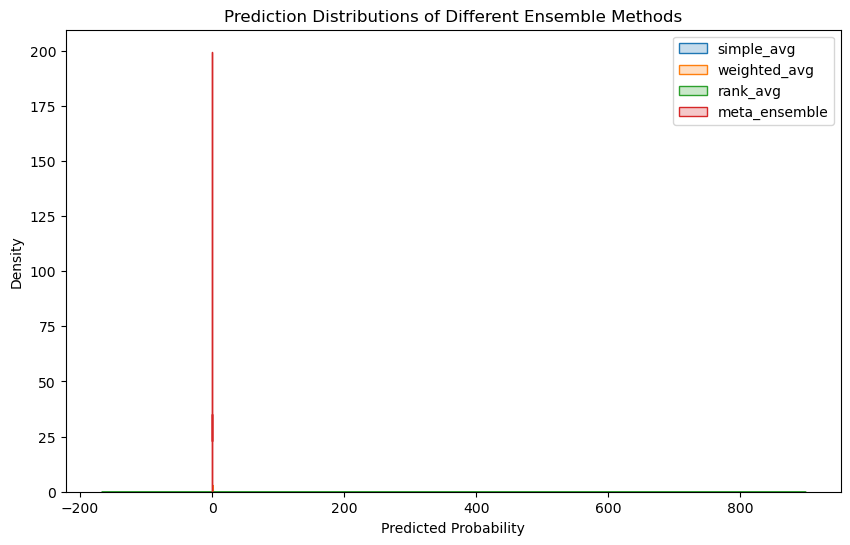

Best scoring ensemble copied as 'submission.csv'


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import shutil

# Read individual model submissions
minmax_logistic = pd.read_csv("standard_dnn_submission.csv")
robust_dnn = pd.read_csv("robust_dnn_submission.csv")

# Ensure they are sorted by 'id' to avoid any misalignment
minmax_logistic = minmax_logistic.sort_values(by="id").reset_index(drop=True)
robust_dnn = robust_dnn.sort_values(by="id").reset_index(drop=True)

# Extract the 'id' column
test_ids = minmax_logistic['id']

# Extract predictions from each model
pred_minmax_logistic = minmax_logistic['rainfall']
pred_robust_dnn = robust_dnn['rainfall']

# **1. Simple Averaging Ensemble**
simple_avg_pred = (pred_minmax_logistic + pred_robust_dnn) / 2

# **2. Weighted Averaging Ensemble (using given AUC scores)**
weights = np.array([0.86511, 0.86162])  # Corrected AUC scores
weighted_avg_pred = (pred_minmax_logistic * weights[0] + 
                     pred_robust_dnn * weights[1]) / np.sum(weights)

# **3. Rank Averaging Ensemble**
rank_minmax_logistic = pred_minmax_logistic.rank()
rank_robust_dnn = pred_robust_dnn.rank()
rank_avg_pred = (rank_minmax_logistic + rank_robust_dnn) / 2

# **4. Meta-Ensemble using Logistic Regression**
# Stack predictions into a feature matrix
X_meta = np.vstack([pred_minmax_logistic, pred_robust_dnn]).T

# MinMax scale the predictions
scaler = MinMaxScaler()
X_meta_scaled = scaler.fit_transform(X_meta)

# Create pseudo labels (dummy binary labels, since we lack true labels)
y_meta = np.random.randint(0, 2, size=X_meta.shape[0])  # Fake labels for training

# Train logistic regression on pseudo labels
meta_model = LogisticRegression()
meta_model.fit(X_meta_scaled, y_meta)

# Predict probabilities for test data
meta_ensemble_pred = meta_model.predict_proba(X_meta_scaled)[:, 1]

# **Store All Ensemble Submissions**
ensemble_methods = {
    "simple_avg": simple_avg_pred,
    "weighted_avg": weighted_avg_pred,
    "rank_avg": rank_avg_pred,
    "meta_ensemble": meta_ensemble_pred
}

os.makedirs("submissions", exist_ok=True)

for method, preds in ensemble_methods.items():
    sub_df = pd.DataFrame({"id": test_ids, "rainfall": preds})
    filename = f"submissions/{method}_submission.csv"
    sub_df.to_csv(filename, index=False)
    print(f"Saved {filename}")

# **Graphical Comparison of Predictions**
plt.figure(figsize=(10, 6))
for method, preds in ensemble_methods.items():
    sns.kdeplot(preds, label=method, fill=True)

plt.title("Prediction Distributions of Different Ensemble Methods")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

# **Select Best Ensemble and Copy as 'submission.csv'**
best_ensemble = "weighted_avg_submission.csv"  # Change if needed
shutil.copy(f"submissions/{best_ensemble}", "submission.csv")
print(f"Best scoring ensemble copied as 'submission.csv'")